---
# Pandas For Business - Women In Data Event 2023
---

**Pandas** is a Python Library, specifically designed for data manipulation and analysis. A vast amount of data in the world is stored and displayed in tables - there is not a single company out there that hasn't *indulged* in building a table in Excel!

### But why Pandas? And why Pandas for Business?
To answer in a sentence, **Pandas** is the most powerful tool for deriving business insights from data. Although Excel has been the go-to place for working with datasets for decades, its easy to use interface soons becomes a liability, as we build on the complexity of the analysis we want to perform. 

Countless tabs with tables, manual data input, fat finger typos - these and many other factors can take away the fun (and efficiency) of analysing data and driving a business narrative.


In this introductory course, we will see in practice how easy it is to explore and analyse a dataset, without any prior programming background. And hopefully convert some 'die-hard Excel users' to Pandas!


**NB: The purpose of this session is to broaden your Data Analysis horizons. Feel free to code along, or simply sit back and observe how easy data can be transformed in Pandas. We all hope you enjoy the next hour!**


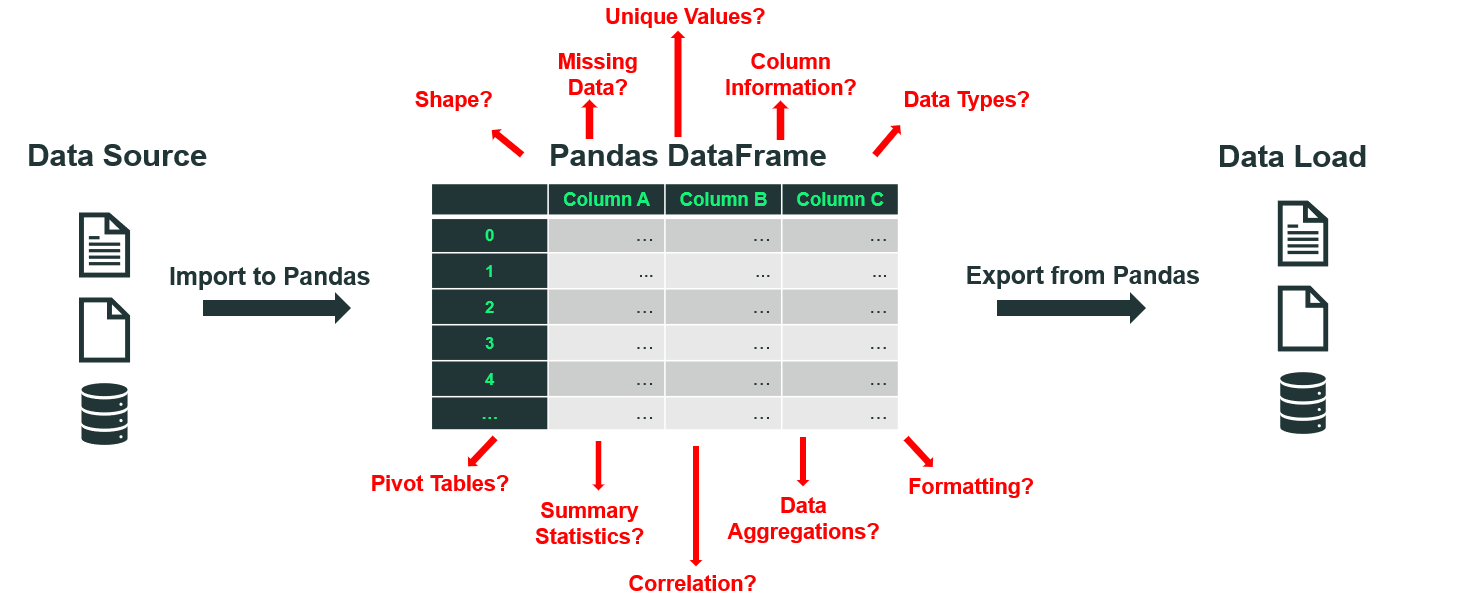

In [ ]:
# Initial pandas import
import pandas as pd

---
## 1. Initial Data Exploration
### 1.1 Loading Data

**Pandas** can easily read external data, stored in a tabular format. In this session we will *import* a dataset from a CSV file in what we call a **DataFrame** - the Pandas term for table:

- ensure the **insurance.csv** file is in the folder, containing your current Jupyter Notebook file
- store the file name under variable `filename`
- use the `pd.read_csv(filename)` function to import the dataset
- take a glimpse at your DataFrame with `df.head()`

**Note:** `df` is called a **variable** - think of it simply as a **name** for the table you will be working with.

In [ ]:
filename = 'insurance.csv'    
df = pd.read_csv(filename)
df.head()

### 1.2 Checking Dataset Dimensions

Pandas DataFrames are **2-dimensional objects** - they consist of **rows** and **columns**. Access to their number allows us to quickly gauge the initial size of the dataset - an important piece of information which we can then track throughout cleaning the data or performing data transformations:

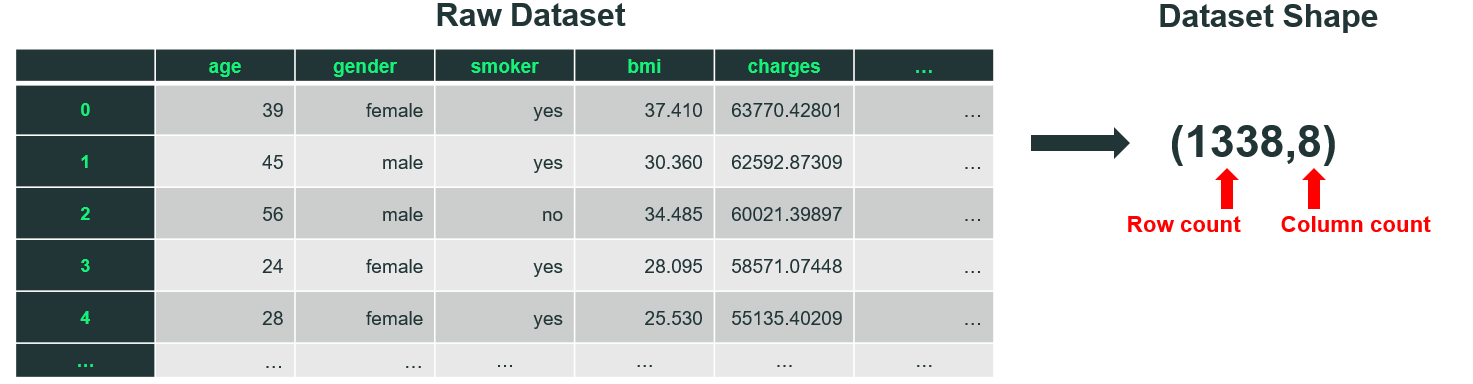
- use the `.shape` attribute on your DataFrame
- the output will be a pair `(x,y)` where `x = row_count` and `y = column_count`

In [ ]:
df.shape

### 1.3 Obtaining Column Information
The next stage of exploring our dataset focuses on providing a more detailed information across the **DataFrame columns**:

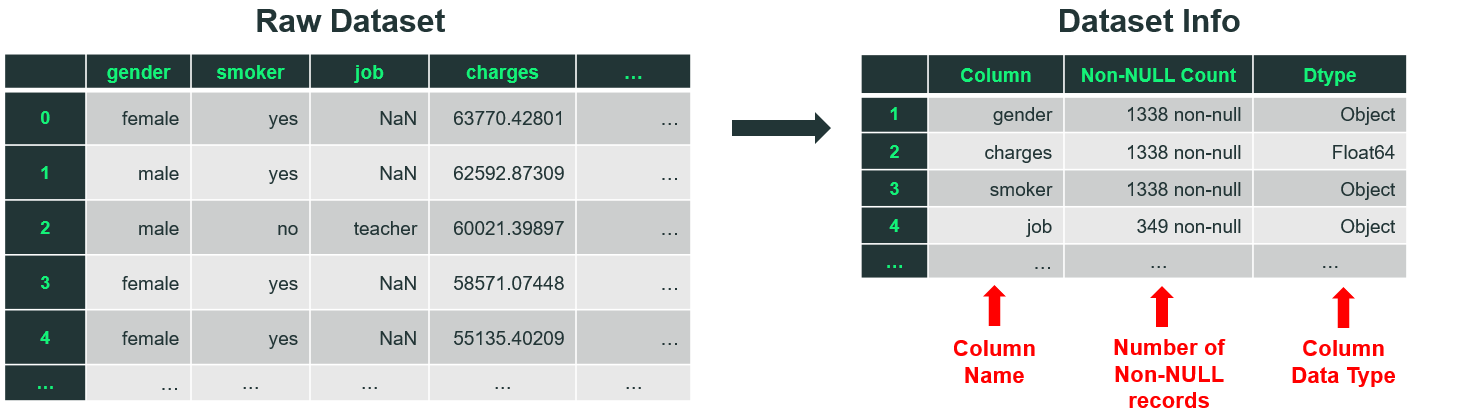
- we can think of each column as a **feature**
- we can then think of rows as **individual observations**, with values across all **features**
- it's important to know the **data type** of each feature, as well as the count of **missing values (NULLs or also NaNs)** per column
- use the `.info()` function to obtain a summary information

In [ ]:
df.info()

### 1.4 Calculating Frequency of Unique Values
Lastly, let's see how easy it is to find the **frequency of observations** across the values of a **categorical column (feature)** in our dataset:

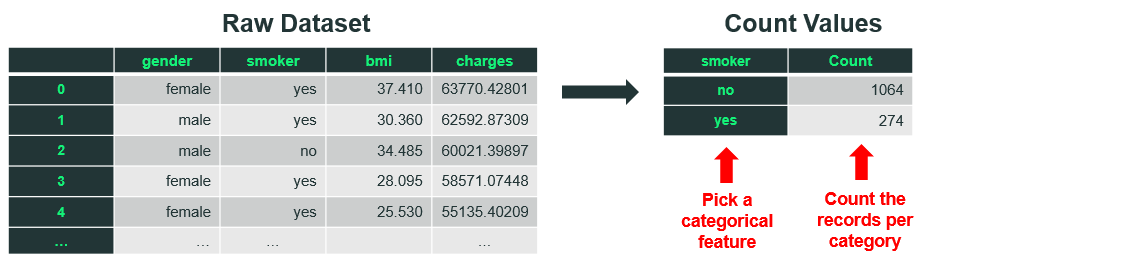
- features can either be of **numeric** or **categorical** type
- features which have a finite range of possible values can be thought of as **categorical** - e.g. `'gender'`, `'smoker'`, `'region'`, etc.
- finding the frequency of observations across each category gives us a sense for the distribution, and a way to uncover representation patterns, outliers, undocumented values
- use the `value_counts()` function

In [ ]:
df['smoker'].value_counts()

---
## 2. Missing Data

### 2.1 Filtering NULL Records
A common task that follows the initial missing data analysis is to produce a **dataset which contains all records with a NULL for a given feature**. This allows us to perform **QA (quality assurance), and facilitate Data Quality Remediation**. This is easily done in Pandas via **Boolean Masking**:
- a **boolean mask** allows us to filter out records (rows), based on a condition
- the `.isnull()` function creates a mask, which filters out **non-NULL** records from a table
- we are left with a table, containing **all NULL records**, which can then be explored and remediated by the business

In [ ]:
mask = df['job'].isnull()
null_df = df[mask]
display(null_df)

### 2.2 Handling Missing Data

Once we have acted on **identifying and flagging the NULLs** in our dataset, often times we need to proceed with another piece of analysis, which requires our data to be in a **clean state**. Handling Missing data ensures **completeness** and is relatively easy, however, it may come at a high expense - of losing valuable data points:

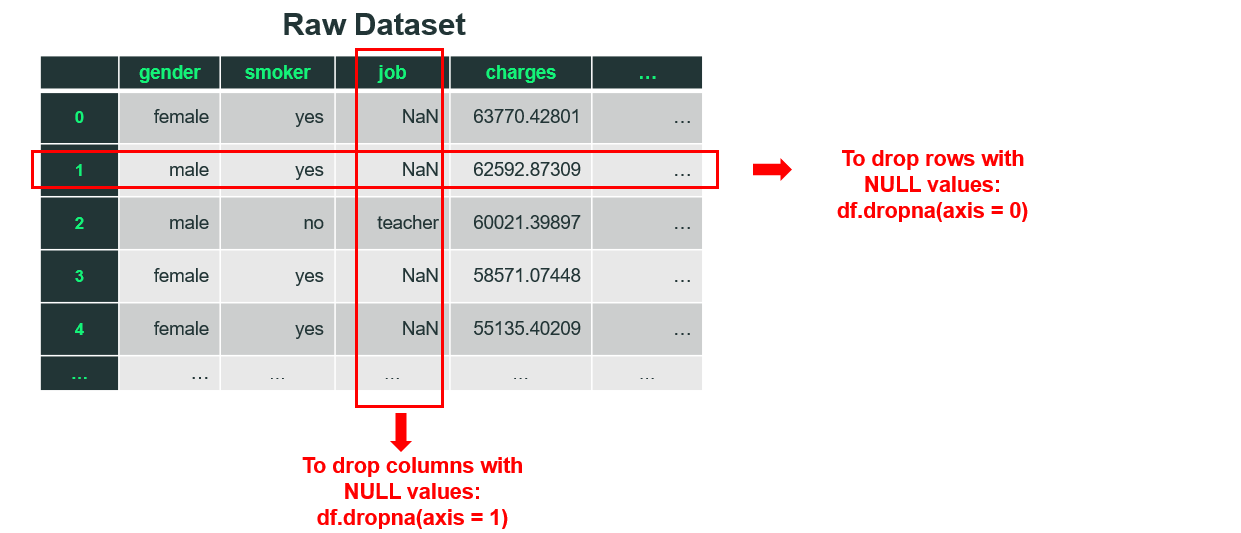
- the simplest way of **handling missing data** is by **dropping them**
- we can either drop **NULL columns** or **NULL rows**
- use the `.dropna(axis = 1)` to drop NULL columns
- use the `.dropna(axis = 0)` to drop NULL rows

In [ ]:
clean_df = df.dropna(axis = 1)
display(clean_df)

In [ ]:
clean_df = clean_df.dropna(axis = 0)
display(clean_df)

---
## 3. Dataset Formatting
### 3.1 Performing Column Selection
Often times we want to work with a **sub-set** of the columns in a dataset:
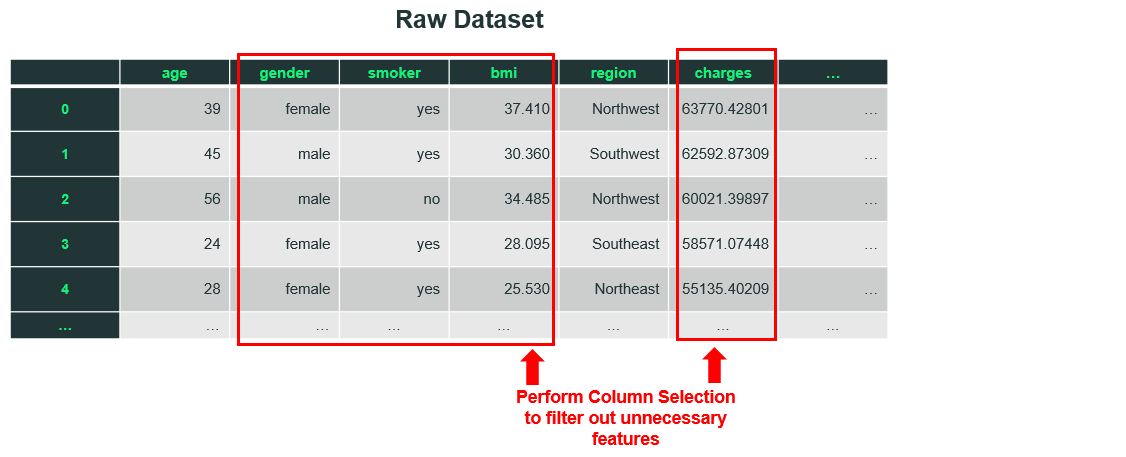
- suppose our table is called `df`
- let's pass the column names we want to preserve in the form of a list - `['col1','col2',...]`
- impose this list on the `df` by passing it in a second pair of square `[]` brackets to perform a **column selection**

In [ ]:
new_df = clean_df[['gender', 'smoker', 'bmi', 'CHARGES']]
display(new_df)

### 3.2 Renaming a Column
Checking for **Label Irregularities** is an important part of any Data Analysis. We have all seen by now that the column `'CHARGES'` is written in capital letters, not following the **naming convention for the rest of our columns**:
- use the `.rename(columns = )` function to rename columns 
- `columns` inside of the function brackets is known as an **argument**
- assign to `columns` a **dictionary** of type `{'current_column_name':'new_column_name'}`

In [ ]:
new_df = new_df.rename(columns = {'CHARGES':'charges'})
display(new_df)

### 3.3 Dropping Duplicates and Sorting
Another two very useful and simple steps to our dataset formatting are **dropping duplicates** and **sorting the dataset** by the values of a given feature:
- use the `.drop_duplicates()` to perform easy deduping
- use the `.sort_values()` function to sort the rows in a table by a given column
- use the `ascending = False` argument if you want to sort in a **descending order**

In [ ]:
new_df = new_df.drop_duplicates()
display(new_df)

In [ ]:
new_df = new_df.sort_values('charges', ascending = False)
display(new_df)

---
## 4. Data Aggregations
### 4.1 Performing a Simple Aggregation
An **Aggregation** is a function that takes a set of values and produces a smaller set (usually a single value). Typical aggregations are:
 - the **average**
 - the **sum**
 - the **count** of a variable, etc.
 
We typically apply an aggregation function to a **numeric feature (variable)** - in our example dataset, that could be `'bmi'` or `'charges'`. 

In [ ]:
average_charge = new_df['charges'].mean()
print(average_charge)

### 4.2 Grouping by a Categorical Column
Now suppose you want to **drill down** by calculating the **average charge** across smokers and non-smokers. This is an example of an aggegation, which involves a **categorical variable** - `'smoker'`:

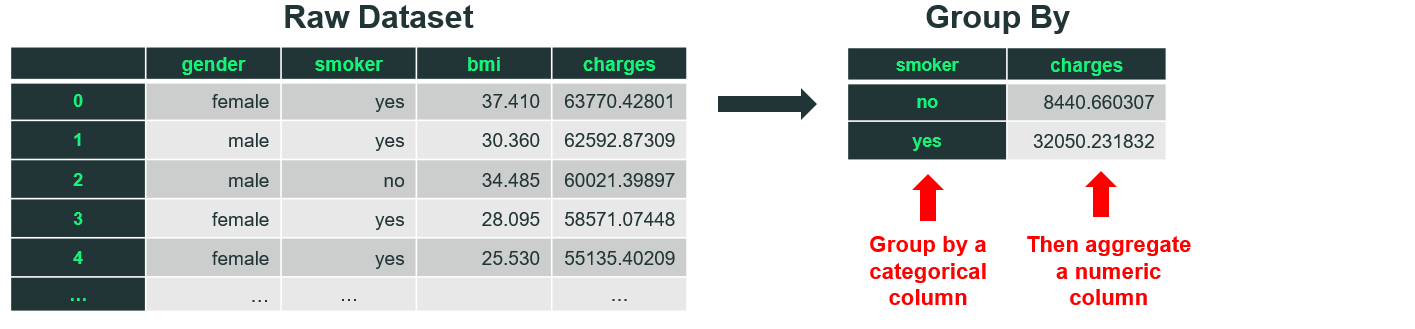
- to produce such analysis we need to **group records by their value for the categorical feature**
- we then **aggregate** each sub-set of rows
- lastly, we **combine** the results in a single summary table
- use the `.groupby()` function to perform the above steps


**Note:** the above steps are also known as the **Split-Apply-Combine** method:

In [ ]:
group_df = new_df.groupby('smoker')['charges'].mean()
display(group_df)

### 4.3 Creating a Privot Table

**Pivot** by definition is a **central point on which a mechanism turns or oscillates** - this is a staple concept in data analysis and something we come across quite often when working with data.

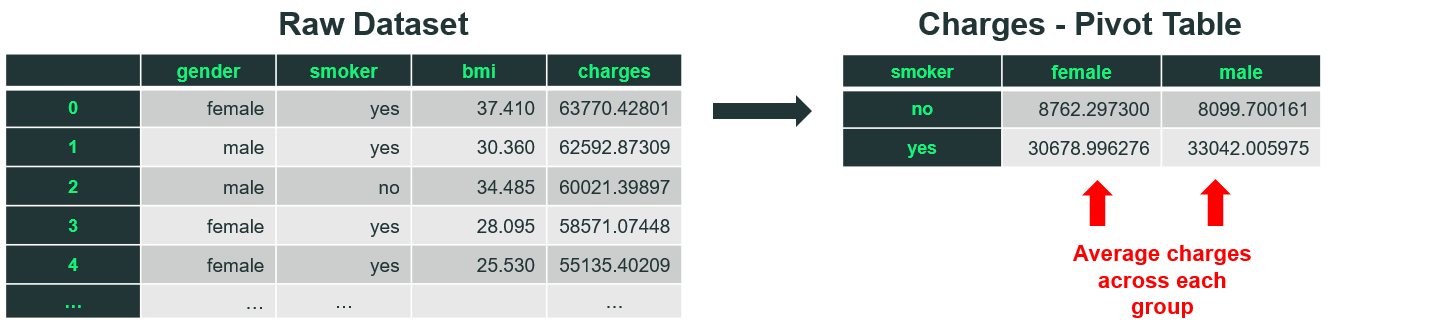

**A Pivot Table** is a **summary tool** that allows us to summarize information from bigger tables:
- suppose you want to calculate the **average charges** across `'gender'` and `'smoker'`
- this is an example, where you want to aggregate by 2 **categorical variables**
- we can assign `'gender'` values to become our **column lables** and `'smoker'` values - our **row labels**
- each cell in our new table will then be the **average charge** for individuals, falling under the given combination
- use the `df.pivot_table(index = 'column_name1', columns = 'column_name2', values = 'column_name3', aggfunc = ....)`


**NB:** To perform pivoting, we need to import **NumPy** - a numeric Python library. If the following code cell executes with an **Error**, please go to your **Anaconda Prompt** and run `pip install numpy`, then attemt running the cell again. 

In [ ]:
import numpy as np

pivot_df = new_df.pivot_table(index = 'smoker', columns = 'gender', values = 'charges', aggfunc = np.mean)
display(pivot_df)

## 5. Summary Statistics
### 5.1 Calculating Moments

**Summary Statistics** by definition is a set of **measures of spread and range**. Widely used in descriptive statistics and data science, Summary Statistics are used to summarise a set of observations, and to gain understanding of how spread our data is.

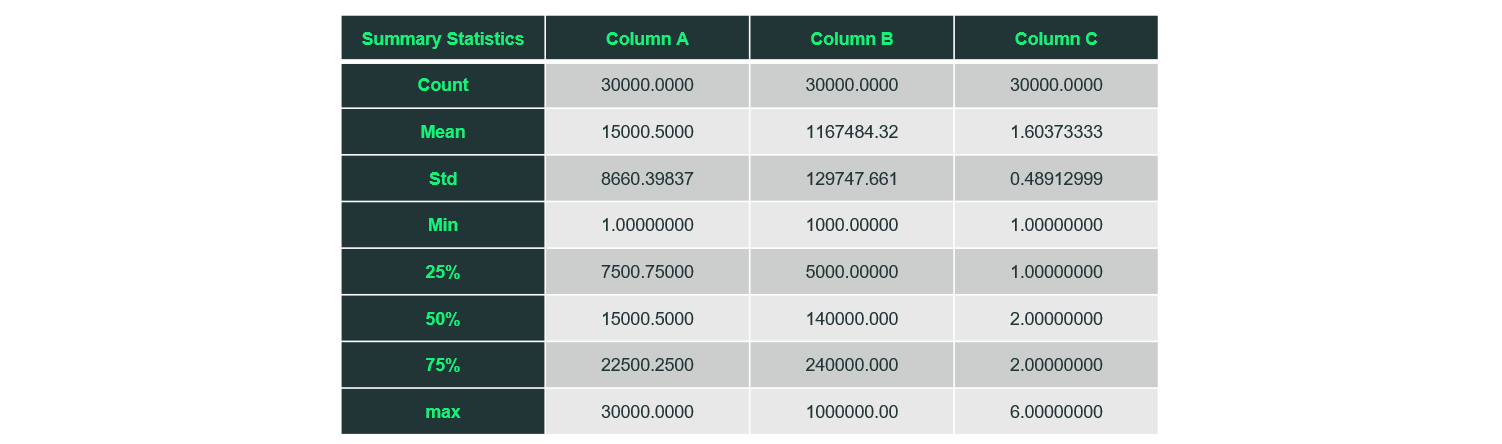

Some of the key statistics are:
- a measure of *central tendency*, such as **arithmetic mean**
- a measure of *statistical dispersion*, such as **standard deviation**


To produce a **summary statistics** table, use the `.describe()` function:

In [ ]:
summary_df = new_df.describe()
display(summary_df)

### 5.2 Statistical Dependence - Calculating Correlations

**Correlation** refers to the **statistical relationship** between two variables. In particular, it describes how the two variables move in relation to one another. Spotting correlations in a dataset enables us to uncover patterns - some of which will be expected, others - surprising. 

The **Pearson correlation** is the most commonly used measurement for a linear relationship between two variables. The **correlation coefficient** can take on a value between **+1** and **-1**:
- a **positive correlation** indicates that the two variables move in the same direction together (*if X increases, Y increases too*). Strongest positive correlation is **+1**
- a **negative correlation** indicates that the two variables move in opposite directions (*if X increases, Y decreases*). Strongest negative correlation is **-1**
- a **correlation of 0** indicates that there is no relationship between the two variables. 

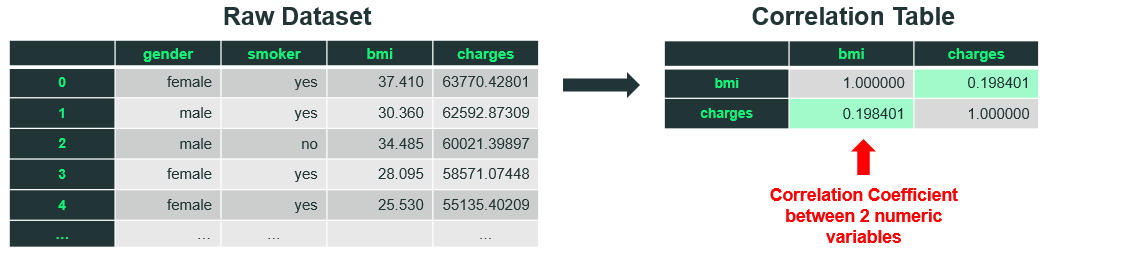

***Important Note!*** : Remember that **correlation does NOT imply causation**! The fact that two variables **X** and **Y** move in the same direction does NOT mean that the movement of **X** is causing the movement in **Y**!

To calculate the **correlation** between the numeric variables in a dataset, use the `.corr()` function:

In [ ]:
corr_df = new_df.corr()
display(corr_df)

## 6. Final Data Export

Let's finish our Introductory Pandas Session by **exporting** a table we produced throughout our analysis:
- use the `.to_csv()` function to export a **DataFrame** to a CSV file
- you can export as many tables as you want 
- the CSV files will be created in the same folder, from where you run your Jupyter Notebook

In [ ]:
summary_df.to_csv('summary_statistics.csv')

***Thank you for participating in this introductory course to Pandas for Business! I do hope that every one of you found something interesting during this training, and hopefully it sparked a new-found passion for Data Analysis and Pandas!***